<a href="https://colab.research.google.com/github/Wanita-8943/efficientnet_keras_transfer_learning/blob/master/%E0%B8%AE_Dataframe_MAE_Male125_150.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##เรียกใช้ CSV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import os
%cd /content
if not os.path.isdir("efficientnet_keras_transfer_learning"):
 !git clone https://github.com/Wanita-8943/efficientnet_keras_transfer_learning
%cd efficientnet_keras_transfer_learning/

/content
Cloning into 'efficientnet_keras_transfer_learning'...
remote: Enumerating objects: 759, done.
remote: Counting objects: 100% (281/281), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 759 (delta 207), reused 248 (delta 187), pack-reused 478
Receiving objects: 100% (759/759), 13.08 MiB | 23.14 MiB/s, done.
Resolving deltas: 100% (447/447), done.
/content/efficientnet_keras_transfer_learning


In [ ]:
df = pd.read_csv (r'/content/drive/MyDrive/cut_panoramic/Data/Test_Male_Regussion.csv')
df

,Fig_Age,Fig_Person_Sex,Age(year),Class,Class_Re,Filename,Path_filename,Sex,Floder
0,101,51,7,Y07M,0,VV83.jpg,/content/drive/My Drive/TVT_Male_Re/test/0/VV8...,เพศชาย,Both
1,102,51,7,Y07M,0,Flip_VV83.jpg,/content/drive/My Drive/TVT_Male_Re/test/0/Fli...,เพศชาย,Both
2,103,52,7,Y07M,0,VV84.jpg,/content/drive/My Drive/TVT_Male_Re/test/0/VV8...,เพศชาย,Both
3,104,52,7,Y07M,0,Flip_VV84.jpg,/content/drive/My Drive/TVT_Male_Re/test/0/Fli...,เพศชาย,Both
4,105,53,7,Y07M,0,VV85.jpg,/content/drive/My Drive/TVT_Male_Re/test/0/VV8...,เพศชาย,Both
...,...,...,...,...,...,...,...,...,...
470,121,77,25,Y25M,18,Flip_J463.jpg,/content/drive/My Drive/TVT_Male_Re/test/18/Fl...,เพศชาย,Both
471,122,78,25,Y25M,18,J464.jpg,/content/drive/My Drive/TVT_Male_Re/test/18/J4...,เพศชาย,Both
472,123,78,25,Y25M,18,Flip_J464.jpg,/content/drive/My Drive/TVT_Male_Re/test/18/Fl...,เพศชาย,Both
473,124,79,25,Y25M,18,J465.jpg,/content/drive/My Drive/TVT_Male_Re/test/18/J4...,เพศชาย,Both


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/cut_panoramic/Model/MAE_M_train_50.h5')

from efficientnet.layers import Swish, DropConnect
from efficientnet.model import ConvKernalInitializer
from tensorflow.keras.utils import get_custom_objects

get_custom_objects().update({
    'ConvKernalInitializer': ConvKernalInitializer,
    'Swish': Swish,
    'DropConnect':DropConnect
})

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/cut_panoramic/Model/MAE_M_train_50.h5')
height = width = model.input_shape[1]

In [ ]:
base_dir = '/content/drive/MyDrive/TVT_Male_Re'
os.makedirs(base_dir, exist_ok=True)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.makedirs(train_dir, exist_ok=True)
validation_dir = os.path.join(base_dir, 'validation')
os.makedirs(validation_dir, exist_ok=True)
test_dir = os.path.join(base_dir, 'test')
os.makedirs(test_dir, exist_ok=True)

In [ ]:
batch_size = 16

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255, #โมเดลส่วนใหญ่ต้องใช้ RGB ในช่วง 0–1
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory #ไดเรกเป้าหมาย
        train_dir,
        # รูปภาพทั้งหมดจะถูกปรับขนาดตามความสูงและความกว้างของเป้าหมาย
        target_size=(height, width),
        batch_size=batch_size,
        # Since we use categorical_crossentropy loss, we need categorical labels
        #เนื่องจากเราใช้ categorical_crossentropy loss เราจึงต้องมีป้ายกำกับตามหมวดหมู่
        class_mode='categorical')

#label
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 1425 images belonging to 19 classes.
{0: '0', 1: '1', 2: '10', 3: '11', 4: '12', 5: '13', 6: '14', 7: '15', 8: '16', 9: '17', 10: '18', 11: '2', 12: '3', 13: '4', 14: '5', 15: '6', 16: '7', 17: '8', 18: '9'}


In [ ]:
test = df[df['Fig_Age'].between(101,125)]
test

,Fig_Age,Fig_Person_Sex,Age(year),Class,Class_Re,Filename,Path_filename,Sex,Floder
0,101,51,7,Y07M,0,VV83.jpg,/content/drive/My Drive/TVT_Male_Re/test/0/VV8...,เพศชาย,Both
1,102,51,7,Y07M,0,Flip_VV83.jpg,/content/drive/My Drive/TVT_Male_Re/test/0/Fli...,เพศชาย,Both
2,103,52,7,Y07M,0,VV84.jpg,/content/drive/My Drive/TVT_Male_Re/test/0/VV8...,เพศชาย,Both
3,104,52,7,Y07M,0,Flip_VV84.jpg,/content/drive/My Drive/TVT_Male_Re/test/0/Fli...,เพศชาย,Both
4,105,53,7,Y07M,0,VV85.jpg,/content/drive/My Drive/TVT_Male_Re/test/0/VV8...,เพศชาย,Both
...,...,...,...,...,...,...,...,...,...
470,121,77,25,Y25M,18,Flip_J463.jpg,/content/drive/My Drive/TVT_Male_Re/test/18/Fl...,เพศชาย,Both
471,122,78,25,Y25M,18,J464.jpg,/content/drive/My Drive/TVT_Male_Re/test/18/J4...,เพศชาย,Both
472,123,78,25,Y25M,18,Flip_J464.jpg,/content/drive/My Drive/TVT_Male_Re/test/18/Fl...,เพศชาย,Both
473,124,79,25,Y25M,18,J465.jpg,/content/drive/My Drive/TVT_Male_Re/test/18/J4...,เพศชาย,Both


In [ ]:
act = test['Class_Re'].tolist() #ค่าจริง
path = test['Path_filename'].tolist() #path

In [ ]:
# act

In [ ]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width)) #รูปทุกรูปมีขนาดไม่เท่ากันจึงตั้งไว้ว่าเวลาจะให้ model ดึงรูปมาทำนายให้ดึงรูปเข้ามาตามขนาดที่ตั้งไว้ตามพารามิตเตอร์
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)  #model ไม่สามารถทำนายรูปภาพโดยตรงได้ จึงเเปลงรูปภาพให้เป็น array เเล้วให้โมเดลทำนาย
    # Reshape
    x = x.reshape((1,) + x.shape) # เพิ่ม ไดเมนชั่นของโมเดล ให้เป็น 4 ได้ เมนชั่น โดยที่ 1, คือบอกให้โมเดลนำเข้าทีละ 1 รูปเเล้วค่อยทำนาย เเละ + ไดเมนชั่น คือ 150 ,150 ,3(สีของ RGB)
    x /= 255.
    result = model.predict([x])
    return result[0]

In [ ]:
predict_image(path[0])

1/1 [==============================] - 0s 54ms/step


array([0.04986721], dtype=float32)

In [ ]:
no = np.argmax(predict_image(path[0]))
labels[no]

1/1 [==============================] - 0s 52ms/step


'0'

In [ ]:
#Predict
pred_list = list()
prob_list = list()
img_path= path
for i in range(0,len(img_path)):
    predict = predict_image(img_path[i])
    result = np.argmax(predict)
    pred_list.append(labels[result])
    prob_list.append(predict[result])

1/1 [==============================] - 0s 90ms/step


In [ ]:
# pred_list

In [ ]:
prob_list

[0.04986721,
 0.054807175,
 0.053031486,
 0.055798978,
 0.053622525,
 0.05027629,
 0.056232743,
 0.058783118,
 0.048219122,
 0.053341445,
 0.05397092,
 0.0554268,
 0.05660295,
 0.05281886,
 0.05277197,
 0.05338811,
 0.046982437,
 0.046827108,
 0.042944085,
 0.04965558,
 0.057822987,
 0.05242431,
 0.059233952,
 0.053246483,
 0.048637222,
 0.057949238,
 0.05714393,
 0.048522007,
 0.05072458,
 0.048522007,
 0.05072458,
 0.057949238,
 0.053548053,
 0.057169493,
 0.0552511,
 0.054817427,
 0.05707788,
 0.057775546,
 0.05651202,
 0.055781476,
 0.054724324,
 0.057567436,
 0.05573126,
 0.053442974,
 0.050898135,
 0.057846796,
 0.057166796,
 0.0565611,
 0.057754524,
 0.051656947,
 0.0536846,
 0.05824303,
 0.056973644,
 0.057132237,
 0.055902693,
 0.057602465,
 0.057427466,
 0.057156995,
 0.053176403,
 0.058033563,
 0.05677788,
 0.052379508,
 0.052424505,
 0.057558313,
 0.054889213,
 0.052756168,
 0.05070873,
 0.056507602,
 0.05242914,
 0.058116727,
 0.056862622,
 0.0581167,
 0.05802334,
 0.05638

In [ ]:
# prob_int = np.int_(prob_list)

In [ ]:
# prob_int

In [ ]:
act = act.astype(str)

In [ ]:
pred = np.array(pred_list) #แปลงเป็น array
act = np.array(act)

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 5.2631578947368425%
              precision    recall  f1-score   support

           0       0.05      1.00      0.10        25
           1       0.00      0.00      0.00        25
          10       0.00      0.00      0.00        25
          11       0.00      0.00      0.00        25
          12       0.00      0.00      0.00        25
          13       0.00      0.00      0.00        25
          14       0.00      0.00      0.00        25
          15       0.00      0.00      0.00        25
          16       0.00      0.00      0.00        25
          17       0.00      0.00      0.00        25
          18       0.00      0.00      0.00        25
           2       0.00      0.00      0.00        25
           3       0.00      0.00      0.00        25
           4       0.00      0.00      0.00        25
           5       0.00      0.00      0.00        25
           6       0.00      0.00      0.00        25
           7       0.00      0.00      

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 66.5, 'Predicted label')

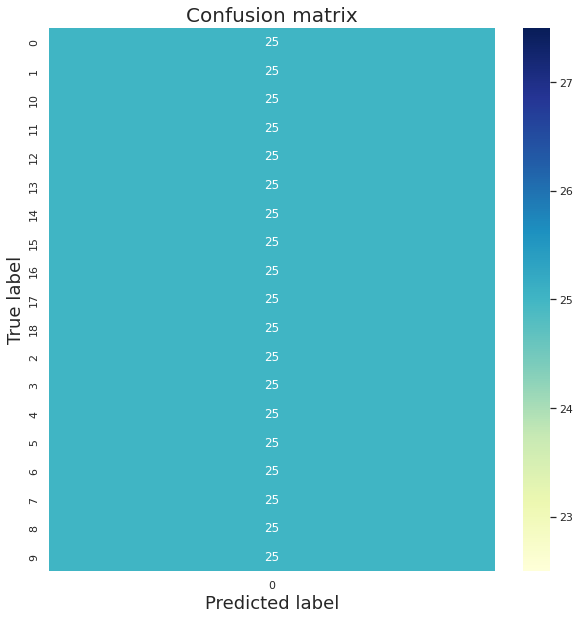

In [ ]:
#create CF 
data = {'Actual': act,'Predicted' : pred,}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)